In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator as interpolate
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d import Axes3D

from DelaunayDemo import * # only works for plotting 3D delaunay triangulations

# Two Dimensional Interpolation

### Test Case 1 - Equilateral Triangle

array([[0.        , 0.        ],
       [2.        , 3.46410162],
       [4.        , 0.        ]])

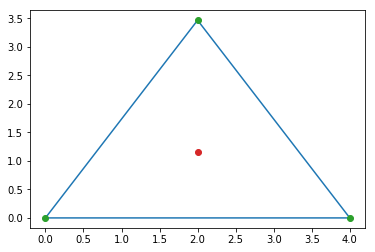

In [22]:
points = np.array([[0, 0], [2, (np.sqrt(3)/2)*4], [4, 0]]) # making points for an equilateral triangle
tri = Delaunay(points) # creating delaunay triangulation
plot_delaunay_2D(tri)

tri_indx = 0 # index of triangle whose centroid we want to plot
plt.plot(centroid(tri, tri_indx)[0], centroid(tri, tri_indx)[1], 'o') # plotting centroid point 
tri.points

In [23]:
f = interpolate(tri, [100,100,100]) # argument form: (delaunay triangulation, vertex values)
f.__call__([centroid(tri, tri_indx)[0], centroid(tri, tri_indx)[1]])

array([100.])

### It is working! The value at the centroid is 100!

# Electric Field Interpolation

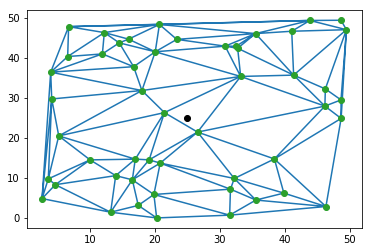

In [24]:
x_grid_amp = 50
y_grid_amp = 50
num_points = 50

points = generate_rand_points([x_grid_amp, y_grid_amp], num_points) # argument form: (dimension_amplitudes, number of points)
tri = Delaunay(points) # creating delaunay triangulation
plot_delaunay_2D(tri)

tri_indx = 10 # index of triangle whose centroid we want to plot
plt.plot(x_grid_amp / 2, y_grid_amp / 2, 'ko') # plotting centroid point 
plt.savefig('fig_3')

### Creating point charge at the black point in the above plot 

In [25]:
charge_magnitude = 5 # units of Coulombs
charge_loc = np.array([x_grid_amp / 2, y_grid_amp / 2])
        
point_charge = PointCharge(charge_loc, charge_magnitude) # creating a point charge

point_charge.charge_loc, point_charge.charge_magnitude

(array([25., 25.]), 5)

### Calculating Electric Field for grid points

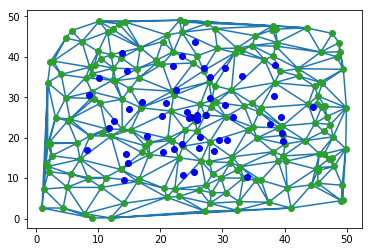

In [26]:
x_grid_amp = 50
y_grid_amp = 50
num_points = 200
num_test_points = 50 # number of linearly spaced test points you would like to create

points = generate_rand_points([x_grid_amp, y_grid_amp], num_points) # argument form: (dimension_amplitudes, number of points)
tri = Delaunay(points) # creating delaunay triangulation
plot_delaunay_2D(tri)

plt.plot(x_grid_amp / 2, y_grid_amp / 2, 'ko') # plotting centroid point 
test_points = random_circular_points(num_test_points, x_grid_amp, y_grid_amp)
plt.plot(test_points[:, 0], test_points[:,1], "bo")

In [27]:
E_field = electric_field(point_charge, tri.points) # actual value of electric field at grid points

f = interpolate(tri, E_field) # argument form: (delaunay triangulation, vertex values)
f.__call__([15,15]) # This value can be easily verified by hand with a calculator

array([2.40752084e+08])

# Interpolating for random test points

In [28]:
E_estimated = f.__call__(test_points) # Estimating electric field values at test points
E_actual = electric_field(point_charge, test_points)
distance_test = np.linalg.norm(test_points - point_charge.charge_loc, axis = 1) # these are the distances of the test points from point charge

Text(0, 0.5, 'Estimated electric field (N/m^2)')

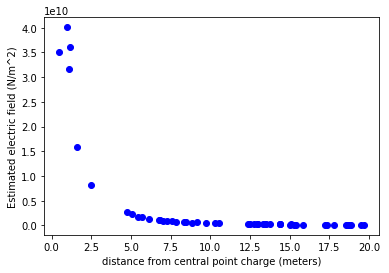

In [29]:
plt.plot(distance_test, E_estimated, "bo") # plot the estimated and actual values as a function of distance from point charge
plt.xlabel('distance from central point charge (meters)')
plt.ylabel('Estimated electric field (N/m^2)')

Text(0, 0.5, 'Actual electric field (N/m^2)')

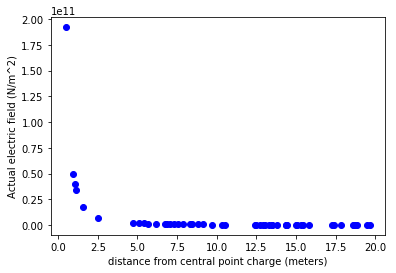

In [30]:
plt.plot(distance_test, E_actual, "bo")
plt.xlabel('distance from central point charge (meters)')
plt.ylabel('Actual electric field (N/m^2)')

### Why are the errors lower for larger distances from the point charge?

Text(0, 0.5, 'Errors (N/m^2)')

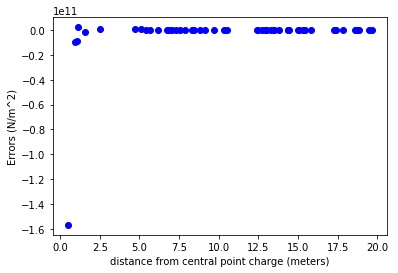

In [31]:
E_error = E_estimated - E_actual
plt.plot(distance_test, E_error, "bo")
plt.xlabel('distance from central point charge (meters)')
plt.ylabel('Errors (N/m^2)')

# Interpolating for points on a line 

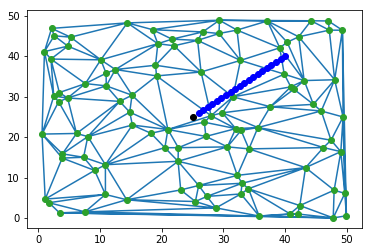

In [32]:
x_grid_amp = 50
y_grid_amp = 50
num_points = 100
num_test_points = 50 # number of linearly spaced test points you would like to create

points = generate_rand_points([x_grid_amp, y_grid_amp], num_points) # argument form: (dimension_amplitudes, number of points)
tri = Delaunay(points) # creating delaunay triangulation
plot_delaunay_2D(tri)

plt.plot(x_grid_amp / 2, y_grid_amp / 2, 'ko') # plotting centroid point 
test_points = random_linear_points(x_grid_amp, y_grid_amp, 20, point_charge, 1) # plotting linear test points
plt.plot(test_points[:, 0], test_points[:,1], "bo")

In [33]:
E_field = electric_field(point_charge, tri.points) # actual value of electric field at grid points

f = interpolate(tri, E_field) # argument form: (delaunay triangulation, vertex values)
f.__call__([15,15]) # This value can be verified with a calculator

array([3.23347098e+08])

In [34]:
E_estimated = f.__call__(test_points) # Estimating electric field values at test points
E_actual = electric_field(point_charge, test_points)
distance_test = np.linalg.norm(test_points - point_charge.charge_loc, axis = 1) # these are the distances of the test points from point charge

Text(0, 0.5, 'Estimated electric field (N/m^2)')

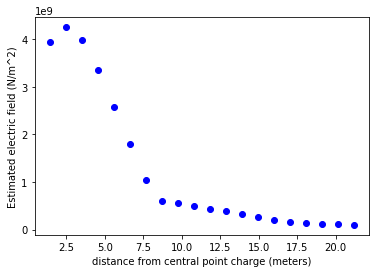

In [35]:
plt.plot(distance_test, E_estimated, "bo") # plot the estimated and actual values as a function of distance from point charge
plt.xlabel('distance from central point charge (meters)')
plt.ylabel('Estimated electric field (N/m^2)')

Text(0, 0.5, 'Actual electric field (N/m^2)')

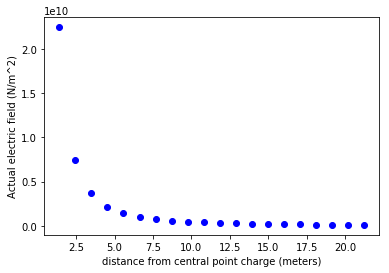

In [36]:
plt.plot(distance_test, E_actual, "bo")
plt.xlabel('distance from central point charge (meters)')
plt.ylabel('Actual electric field (N/m^2)')

Text(0, 0.5, 'Errors (N/m^2)')

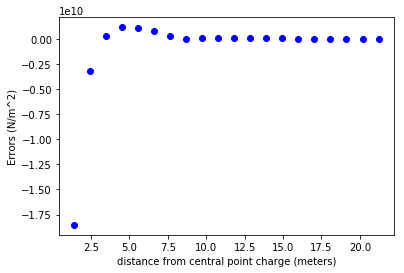

In [37]:
E_error = E_estimated - E_actual
plt.plot(distance_test, E_error, "bo")
plt.xlabel('distance from central point charge (meters)')
plt.ylabel('Errors (N/m^2)')

# Three Dimensions!

In [38]:
x_amplitude = 5
y_amplitude = 5
z_amplitude = 4
dimension_amplitudes = np.array([x_amplitude, y_amplitude, z_amplitude])
num_points = 20

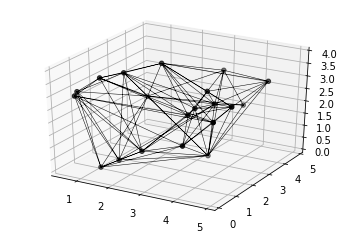

In [39]:
points = generate_rand_points(dimension_amplitudes, num_points) 
irregular_triangulation = Delaunay(points)

fig = plt.figure()
ax = plt.axes(projection='3d')
plot_delaunay_3D(ax, points, irregular_triangulation)
plt.savefig('fig_1')

In [40]:
x_amplitude = 5
y_amplitude = 5
z_amplitude = 5
dimension_amplitudes = np.array([x_amplitude, y_amplitude, z_amplitude])
num_points = 100

In [41]:
# the number of dimensions is infered by the length of the amplitude array
points = generate_rand_points(dimension_amplitudes, num_points) 

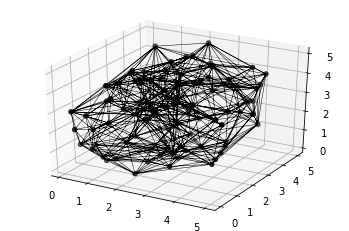

In [42]:
box_triangulation = Delaunay(points)
fig = plt.figure()
ax = plt.axes(projection='3d')
plot_delaunay_3D(ax, points, box_triangulation)
plt.savefig('fig_2.png')